In [5]:
# KoNLPy (한국어 형태소 분석) 설치
!pip install konlpy

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [1]:
# vscode 버전 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows 환경 기준 나눔고딕 폰트 경로
font_path = 'c:/WINDOWS/Fonts/MALGUN.TTF'

# 폰트 등록
fm.fontManager.addfont(font_path)

# matplotlib에 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from konlpy.tag import Okt
from collections import Counter
import re

# 1. 원문 텍스트 데이터 정의
text_data = """
여러 기능을 통합한 서비스
답변 1개
쉬운 투자 용어, 나의 투자 성향에 맞는 안전한 상품 추천, 분산된 정보를 하나의 서비스에서 제공
답변 1개
핵심정보만 골라서 알기 쉽게 요약
답변 1개
핵심정보 정확한 정보만 요약 하여 제공 필요
답변 1개
안전하고 높은 수익률 자동 추천 기능
답변 1개
투자수익율이 높은 가격이나 정보를 알아서 제공
답변 1개
자동 매수 매도를 하기 전에 컨펌 받고 하는 기능
답변 1개
다양한 정보를 모아서 알아 듣기 쉽게 제공하는 기능
답변 1개
별도로 투자 용어들 설명 필요.
답변 1개
핵심 정보만 골라서 알기 쉽게 요약하고 투자자의 관심종목을 제시하면 우량상품 추천 서비스 제공
답변 1개
쉬운 투자 용어설명
답변 1개
알기쉽게요약
답변 1개
투자 성향 분석 후 안전한 우량주 추천
답변 1개
쉬운투자 용어
답변 1개
자동 고수익투자
답변 1개
내 목표가에 맞는 자동 매수 및 매도
답변 1개
핵심만 골라 추천
답변 1개
잘모름
답변 1개
ㅇㅇ
답변 1개
초보자를위한 매뉴얼.안전한상품추천
답변 1개
종목별 매수 매도 타이밍
답변 1개
관심있는 종목에 대한 정보
답변 1개
AI 투자 관리 서비스
답변 1개
분산된 정보를 하나의 서비스에서 제공
답변 1개
핵심정보만 알기쉽게요약
답변 1개
투자관리
답변 1개
추가 돈을 내지 않더라도 알아서 투자 관리 해 주는 시스템 도입 필요
답변 1개
해당 업체의 세부적인 정보 제공 필요.
답변 1개
한달이 아닌 3달 이상 내 목표가를 지정하면 기한 두지 말고 해당 목표 가로 매수/매도 되는 기능 (현재는 기간 제약 )
답변 1개
세금 감면 기능 포함필요.
답변 1개
쉬운 투자 용어 사용 금지, 정확한 단어 표기 및 다양한 보조지표 추가 설정 기능, 실시간 투자별 매수 매도 현황 표시
답변 1개
1. 종목추천. 추천 사유를 제시하고 여러 종목을 추천. 2. 자동으로 사고 팔고 하는 기능. 지정된 금액이하 자동매수, 일정 수익이상 자동매도등의 작업등을 지속적으로 자동운영
답변 1개
핵심정보 요약 투자종목 추천
답변 1개
지금시장의 주도주와 보유주식과의 관계
답변 1개
보유종목에 대한 공시 또는 뉴스가 나올때 즉시로 팝업으로 소식을 전달하면 좋겠습니다
답변 1개
정보 제공
답변 1개
초보자도 쉽게 주식용어 설명
답변 1개
예약매수 기능이 기간에 관계 없어 목표가에 맞으면 매수/매도 해 주는 기능
답변 1개
나의 투자 패턴에 의한 상품 추천
답변 1개
직관적이고 쉬운매수 매도
답변 1개
쉬운투자용어
답변 1개
내 목표가에 맞는 종목별 자동 매수 및 매도
답변 1개
투자 용어를 쉽게 알려주는 서비스가 있었으면 좋겠다
답변 1개
목표수익율에 맞는 포토폴리어제시, 단기및 중장기 경제흐름 분석자료. 배당주등에대한정보등연령이 높으면 수익률도중요하나 안정적 배당선호
답변 1개
핵심정보만 골라서 알기 쉽게 요약
답변 1개
모름
답변 3개
현재 주식시장 현황을 한눈에 알 수 있게 ai가 분석해줬으면 좋겠다
답변 1개
초보자들 자산 맞춤 설계
답변 1개
주식흐름
답변 1개
손실보지않게 자동매도기능
답변 1개
상품추천
답변 1개
정보
답변 1개
개인에 맞는 투자상품
답변 1개
쉬운용어, 핵심정보
답변 1개
교육
답변 1개
핵심정보.쉬게설명된용어.차트사용방법.쉽게 볼은있는 가업정보
답변 1개
관심없음
답변 1개
나의 투자성향에 맞는 안전한 상품 추천
답변 1개
발전가능한 미래업체투자
답변 1개
핵심정보 요약
답변 1개
빅데이터를 통한 안전한 주식 투자 혹은 일부 원금손실에 대한 일부 복구시스템이 필요한거 같습니다
답변 1개
성공전략 핵심분석방법
답변 1개
총체적관리
답변 1개
나의 투자 성향에 맞는 안전한 상품 추천
답변 1개
i
답변 1개
주식을 안해서 모르겠음
답변 1개
알기 쉽게 요약
답변 1개
요약된 뉴스 정보를 제공하는 서비스
답변 1개
쉬운 투자 용어필요.
답변 1개
그날 경제 뉴스 분석
답변 1개
핵심정보 요약
답변 1개
모든 니의투자 정보 쉽게 확인가능한 서비스
답변 1개
해당종목의 투자 성공률 표기
답변 1개
분산된 정보를 하나의 서비스에서 제공
답변 1개
다양한 기기에서 웹 화면이 출력되었으면 좋을 것 같습니다.
답변 1개
고령자를 위한 쉬운 시스템과 원격지원 서비스
답변 1개
"""

# 두 텍스트를 하나로 합치기
full_text = text_data

# 2. 데이터 클리닝
cleaned_text = re.sub(r'답변 \d+개', '', full_text)
cleaned_text = re.sub(r'[a-zA-Z\n\.]', ' ', cleaned_text)
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()


# 3. 형태소 분석 및 명사 추출 (Okt 사용)
okt = Okt()
nouns = okt.nouns(cleaned_text)

# 4. 불용어(Stopwords) 정의 및 제거
# 의미 없는 단어, 조사, 이모티콘 등 제거 (사용자 정의 불용어 추가)
stopwords = [
    '투자', '서비스', '제공'
]

# 한 글자 단어 및 불용어 제거
filtered_nouns = [
    word for word in nouns 
    if len(word) > 1 and word not in stopwords
]

# 5. 빈도수 계산
word_counts = Counter(filtered_nouns)

# 6. 워드 클라우드용 딕셔너리 생성
data_for_wordcloud_auto = dict(word_counts)

print("--- 자동 추출된 워드 클라우드 데이터 (빈도수) ---")
print(data_for_wordcloud_auto)

# --- 7. 빈도수를 기준으로 내림차순 정렬 추가 ---
# 딕셔너리의 items()를 기준으로, 각 항목(key-value 쌍)의 value(빈도수, 인덱스 1)를 기준으로 정렬
sorted_word_counts = sorted(
    data_for_wordcloud_auto.items(), 
    key=lambda item: item[1], 
    reverse=True # 내림차순 정렬
)

print("\n--- 빈도수 기준 내림차순 정렬 결과 ---")
# 튜플 리스트 형태 [(단어, 빈도), ...]로 출력됩니다.
for word, count in sorted_word_counts:
    print(f"'{word}': {count}")

--- 자동 추출된 워드 클라우드 데이터 (빈도수) ---
{'여러': 2, '기능': 11, '통합': 1, '용어': 10, '성향': 4, '상품': 8, '추천': 14, '분산': 3, '정보': 24, '하나': 3, '핵심': 12, '요약': 11, '필요': 6, '수익률': 2, '자동': 10, '수익': 4, '가격': 1, '매수': 10, '매도': 9, '컨펌': 1, '듣기': 1, '별도': 1, '설명': 4, '투자자': 1, '관심': 3, '종목': 9, '제시': 3, '우량': 2, '분석': 5, '목표': 6, '초보자': 3, '매뉴얼': 1, '타이밍': 1, '대한': 3, '관리': 4, '추가': 2, '내지': 1, '시스템': 3, '도입': 1, '해당': 3, '업체': 2, '세부': 1, '달이': 1, '이상': 2, '지정': 2, '기한': 1, '가로': 1, '현재': 2, '기간': 2, '제약': 1, '세금': 1, '포함': 1, '사용': 2, '금지': 1, '단어': 1, '표기': 2, '보조': 1, '지표': 1, '설정': 1, '실시간': 1, '현황': 2, '표시': 1, '사유': 1, '사고': 1, '팔고': 1, '금액': 1, '이하': 1, '일정': 1, '도등': 1, '작업': 1, '지속': 1, '운영': 1, '금시': 1, '도주': 1, '보유': 2, '주식': 4, '관계': 2, '공시': 1, '뉴스': 3, '즉시': 1, '팝업': 1, '소식': 1, '전달': 1, '식용어': 1, '예약': 1, '패턴': 1, '직관': 1, '포토': 1, '폴리': 1, '단기': 1, '장기': 1, '경제': 2, '흐름': 2, '자료': 1, '배당': 2, '연령': 1, '안정': 1, '선호': 1, '모름': 1, '주식시장': 1, '한눈': 1, '자산': 1, '맞춤': 1, '설계': 1, '손실': 2, '보지

--- 상위 20개 키워드 및 빈도수 ---
{'정보': 24, '추천': 14, '핵심': 12, '기능': 11, '요약': 11, '용어': 10, '자동': 10, '매수': 10, '매도': 9, '종목': 9, '상품': 8, '필요': 6, '목표': 6, '분석': 5, '성향': 4, '수익': 4, '설명': 4, '관리': 4, '주식': 4, '분산': 3}


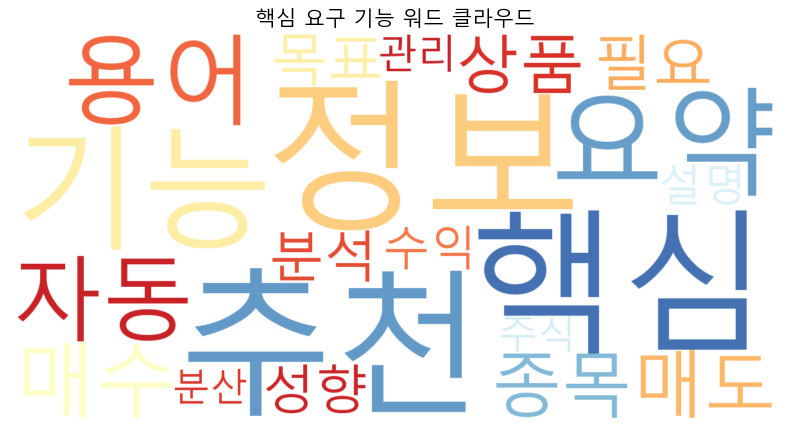

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# --- 상위 20개 항목만 추출하여 새로운 딕셔너리 생성 ---
# (이전 코드에서 이미 내림차순 정렬된 sorted_word_counts 리스트를 사용)
top_20_words = dict(sorted_word_counts[:20])

print("--- 상위 20개 키워드 및 빈도수 ---")
print(top_20_words)

# 1. 폰트 경로 설정 (사용자 환경에 맞게 경로 지정 필요)
font_path = 'C:/Windows/Fonts/malgun.ttf' 

# 2. WordCloud 객체 생성 (***대비 강화 파라미터 추가/수정***)
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    colormap='RdYlBu', 
    width=1200,
    height=600,
    prefer_horizontal=1.0, 
    
    # --- 대비 극대화 옵션 ---
    max_font_size=250,    # 최대 글자 크기 증가
    min_font_size=10,     # 최소 글자 크기 감소 (빈도 낮은 단어를 더 작게)
    relative_scaling=0.1  # 빈도수 스케일링을 0.1로 낮춰 대비 극대화
    # -----------------------
)

# 3. 상위 20개 딕셔너리로 워드 클라우드 생성
wordcloud.generate_from_frequencies(top_20_words) 

# 4. 시각화 (figure size도 가로형으로 수정)
plt.figure(figsize=(10, 5)) # figsize를 WordCloud width/height에 맞춰 가로형으로 수정
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('핵심 요구 기능 워드 클라우드', fontsize=15)
plt.axis('off') # 축 제거
plt.show()